In [108]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
import copy
from tqdm.notebook import tqdm
from numba import jit
from scipy import stats
import networkx as nx
import re


import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb,amsmath}'

plt.rcParams["figure.figsize"] = 11.7, 8.3
plt.rcParams["figure.dpi"] = 75

plt.rcParams["font.size"] = 28
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']

plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.fontsize"] = "small"

plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["lines.markersize"] = 14
plt.rcParams["lines.markeredgewidth"] = 2

plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8

In [131]:
df = pd.read_csv("../results/time_complexity_network_generation_new_24_03_25_new3.txt")
# df['size'] = df['size'].astype(int)
df.head()

,size,thread,i,time
0,500,1,0,0.064494
1,500,1,1,0.067861
2,500,1,2,0.067215
3,500,1,3,0.067848
4,500,1,4,0.067917


In [132]:
df[df['size'] == 10000]

,size,thread,i,time
600,10000,1,0,5.309732
601,10000,1,1,27.676787
602,10000,1,2,13.123357
603,10000,1,3,30.639906
604,10000,1,4,9.311817
...,...,...,...,...
745,10000,4,45,5.000195
746,10000,4,46,3.375602
747,10000,4,47,7.104331
748,10000,4,48,7.270956


In [138]:
df.groupby(["size", "thread"])["time"].median()

size   thread
500    1          0.067855
       2          0.056581
       4          0.048636
1000   1          0.220589
       2          0.195761
       4          0.108282
2000   1          0.835092
       2          0.602145
       4          0.406580
5000   1          3.975275
       2          3.030109
       4          1.912167
10000  1         13.882941
       2         10.775644
       4          7.589843
Name: time, dtype: float64

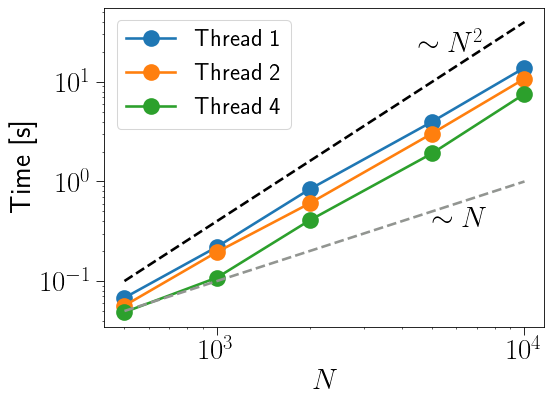

In [161]:
# Group the data by 'size' and 'thread' and compute the average time
grouped = df.groupby(["size", "thread"])["time"].median().reset_index()

threads = grouped["thread"].unique()
plt.figure(figsize=(8, 6))
for t in threads:
    data = grouped[grouped["thread"] == t]
    plt.plot(data["size"], data["time"], marker="o", label=f"Thread {t}")

xx = np.linspace(500, 1e4)
plt.plot(xx, 4*xx**2/1e7, color='black', linestyle='--')
plt.plot(xx, 1000*xx**1/1e7, color='xkcd:grey', linestyle='--')
plt.text(4500, 20, r'$\sim N^2$')
plt.text(5000, 0.35, r'$\sim N$')

plt.xlabel(r"$N$")
plt.ylabel("Time [s]")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
# plt.savefig("/home/rob/Dropbox/BenchmarkFeatures/Paper/IEEE Transaction on neural networks and learning systems/SI_second_round/plots/time_complexity.pdf")


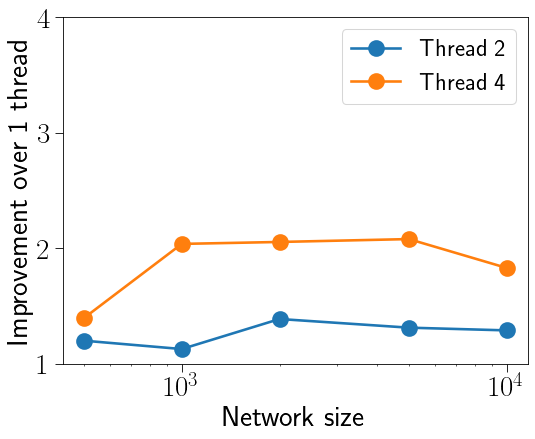

In [136]:
# Group the data by 'size' and 'thread' and compute the average time
grouped = df.groupby(["size", "thread"])["time"].median().reset_index()

threads = grouped["thread"].unique()
plt.figure(figsize=(8, 6))
for t in [2, 4]:
    data = grouped[grouped["thread"] == t]
    data1 = grouped[grouped["thread"] == 1]
    plt.plot(data["size"], data1['time'].values / data["time"].values, marker="o", label=f"Thread {t}")

xx = np.linspace(1e3, 1e4)
# plt.plot(xx, 6*xx**2/1e7, color='black', linestyle='--')
plt.xlabel("Network size")
plt.ylabel("Improvement over 1 thread")
plt.xscale('log')
# plt.yscale('log')
plt.ylim(1, 4)
plt.legend()